In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
file = ".//Data//Small_Data//offline_sales.json"

In [220]:
## Create DF with offline data
df = pd.read_json(file, lines=True, dtype={'customer_id': str})
## Read customer_id as string to deal with big numbers

# 01 - Exploratory Data Analysis | Análise Exploratória de Dados

In [221]:
## Checking DF
df.head(10)

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id
0,2018-08-01,RN,3162633,323932636465316,643839313230323,1,279.0,None
1,2018-08-01,RN,3162633,326463633336323,613665646663346,1,229.0,None
2,2018-08-01,RN,3162633,333331346330323,343739666265353,1,179.0,None
3,2018-08-01,RN,3162633,393461383633336,373034633762613,1,269.0,None
4,2018-08-01,RN,3162633,616531626536373,343634373062363,1,29.0,None
5,2018-08-01,RN,3162633,626462353638383,616339353035393,1,459.0,None
6,2018-08-01,RN,3162633,653363623539323,346165376638356,1,369.0,None
7,2018-08-01,RN,3162633,666639323036376,643839313363376,1,149.0,30373934343338363136
8,2018-08-01,RN,3162633,636238633865636,333835396465353,1,198.0,30393833353363303832
9,2018-08-01,RN,3162633,626239383061353,343332613639373,1,229.0,31366262653431626130


In [226]:
## Replace None to NaN
df.customer_id.replace('None', np.nan, inplace=True)

In [227]:
## Total Entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29372 entries, 0 to 29371
Data columns (total 8 columns):
date              29372 non-null datetime64[ns]
state             29372 non-null object
store_id          29372 non-null int64
sale_id           29372 non-null int64
off_product_id    29372 non-null int64
quantity          29372 non-null int64
price             29372 non-null float64
customer_id       25844 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 1.8+ MB


**29372 rows, 8 columns**

In [228]:
## Check dtypes
df.dtypes

date              datetime64[ns]
state                     object
store_id                   int64
sale_id                    int64
off_product_id             int64
quantity                   int64
price                    float64
customer_id               object
dtype: object

# 02 - Preparation | Preparação

## 2.1 Data Cleaning - NaN | Limpeza de Dados - NaN

In [236]:
## Checking for NaN values
df.isnull().sum()

date              0
state             0
store_id          0
sale_id           0
off_product_id    0
quantity          0
price             0
customer_id       0
dtype: int64

**3528 NaN values on customer_id column**  
**Clean or manipulate this**  
**12% of costumer_id is Empty**

In [237]:
## Create DF with no null values (not best aproach but the missing Data is ID's, what do with this?)
no_null = df
no_null.dropna(axis=0, inplace=True)
no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25844 entries, 7 to 29371
Data columns (total 8 columns):
date              25844 non-null datetime64[ns]
state             25844 non-null object
store_id          25844 non-null int64
sale_id           25844 non-null int64
off_product_id    25844 non-null int64
quantity          25844 non-null int64
price             25844 non-null float64
customer_id       25844 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 1.8+ MB


In [238]:
## Drop old Index Column and Create a new one
no_null = no_null.reset_index().drop(columns=['index'])
no_null.head()

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id
0,2018-08-01,RN,3162633,666639323036376,643839313363376,1,149.0,30373934343338363136
1,2018-08-01,RN,3162633,636238633865636,333835396465353,1,198.0,30393833353363303832
2,2018-08-01,RN,3162633,626239383061353,343332613639373,1,229.0,31366262653431626130
3,2018-08-01,RN,3162633,376465626630613,306439363765386,1,58.0,32653962626632373464
4,2018-08-01,RN,3162633,666564646366383,336139376666306,1,58.0,34653761646637306265


## 2.2 Data Cleaning - Outliers | Limpeza de Dados - Outliers

In [247]:
## Check Outliers on Quantity Colunm
print('Max:',no_null.quantity.max())
print('Min:',no_null.quantity.min())

Max: 5
Min: 1


In [259]:
## Check Outliers on Price
no_null.price.describe()

count    25844.0000000000000000
mean       472.1493143476241698
std        847.5659387348144946
min          0.0100000000000000
25%        169.0000000000000000
50%        289.0000000000000000
75%        578.2500000000000000
max      39690.0000000000000000
Name: price, dtype: float64

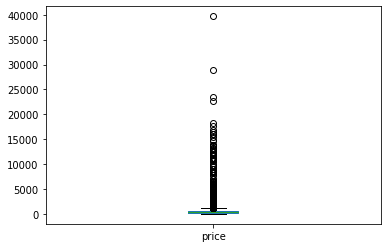

In [288]:
no_null.price.plot(kind='box')

**Grande quantidade de valores grandes**


In [300]:
## Check the median because the mean may be altered by the large price values 
no_null.price.median()

289.0

**Mediana = 289, isso mostra que a media dos preços tende a subir devido as compras de alto valor, o gasto de usuários comuns (gastos mais frequentes) são representados melhor pela mediana**  
**Por enquanto irei manter os valores altos por completo**

## 2.3 Data Cleaning - Duplicated | Limpeza de Dados - Duplicados 

In [317]:
## Verificar dados duplicados
no_null.duplicated().sum()

0

**Sem linhas duplicadas**